In [2]:
#Необходимые модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Непрерывное "Гамма" распределение

$$F(x) = {\frac {\gamma (x/\theta ,k)}{\Gamma (k)}}$$

где

${\gamma (x/\theta ,k)} = {\int_0^z t^{a-1} e^{-t}\, dt}$

${\Gamma (k)} = {\int_z^\infty t^{a-1} e^{-t}\, dt}$

${\displaystyle k>0,\,\theta >0}$ - коэффициенты масштаба

Информация из [википедии](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

In [3]:
k = 1
theta = 2.0

n = [5., 10., 50., 100., 200.] # Обьемы
colors = ['red', 'yellow', 'green', 'blue', 'purple']

gamma_rv = sts.gamma(theta, k)#Создаю гамма функцию соглассно scipy документации
args = np.linspace(0, 20, 100)
vals = gamma_rv.pdf(args)

# График плотности распределения и гистограмма выборки

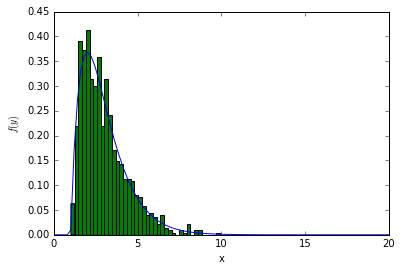

In [6]:
plt.plot(args,vals);
plt.xlabel('x');
plt.ylabel('$f(y)$');
samples = gamma_rv.rvs(1000);
plt.hist(samples, bins = 40, normed=True);

# Гистограммы распределений выборочных средних и их теоретические нормальные распределение

Мат. ожидание ${E} [X]=k{\theta }$

Дисперсия ${E} [X]=k{\theta }$

В scypi.stats.gamma мат. ожидание и дисперсия вычисляются автоматически

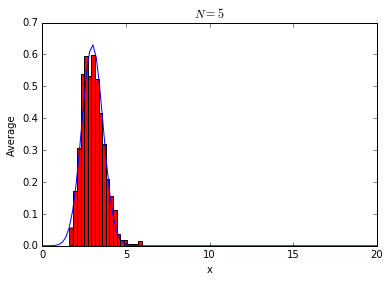

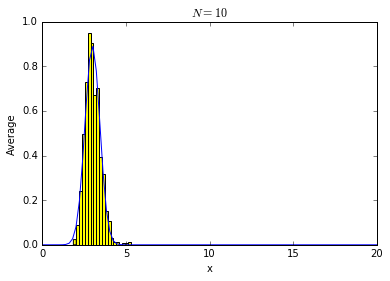

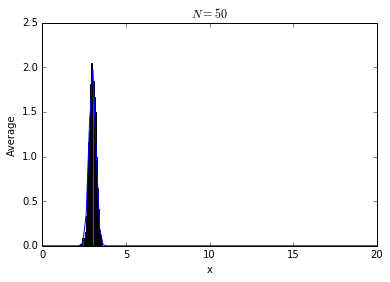

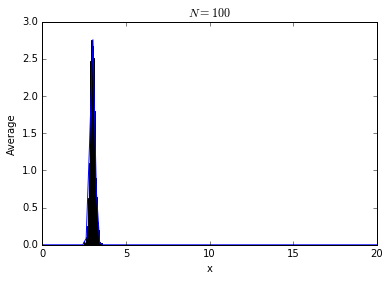

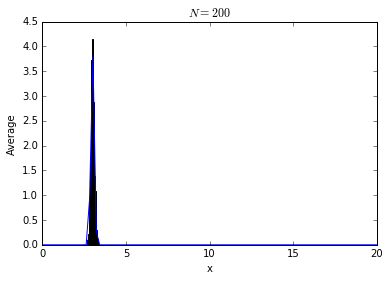

In [10]:
for i in n: # Для каждого обьема
    arg = np.linspace(0, 20, 100)
    #(D/i)**(1./2) - оцениваеммая сигма
    #Создаем и выводим график теорию нормального распределения
    mu = gamma_rv.mean() # Возвращает среднее (мат. ожидание)
    D = gamma_rv.var()   # Возвращает дисперсию
    norm_rv = sts.norm(mu, (D/i)**(1./2))
    val = norm_rv.pdf(arg)
    plt.plot(arg, val)
    plt.ylabel('Average')
    plt.xlabel('x')
    plt.title('$N = %s$' %int(i))
    avg = []
    #Создаем 1000 обьектов одного обьема и подсчитываем их среднее
    #Затем выводим их в виде гисмтограммы
    for j in range(1000):
        avg.append(np.mean(gamma_rv.rvs(int(i))))
    plt.hist(avg, bins = 20, color = colors[n.index(i)], normed = True)
   
    plt.show()

## Заключение:

Распределение среднего значения становится ближе к нормальному распределению с модой и дисперсией рассчитанных изменяемым обьемом(количеством значений).